In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import json
import os

## Get all the directories

In [4]:
path_dir = './model_epoch'
folder_index = len(path_dir) + 1
subdirs = [x[0] for x in os.walk(path_dir)]
subdirs.remove(path_dir)
subdirs.sort()
print(subdirs)

['./model_epoch/model1', './model_epoch/model1_3_smaller_hidden_size', './model_epoch/model1_nodropout', './model_epoch/model_with_stats', './model_epoch/model_with_stats_3_smaller_hidden_size', './model_epoch/model_with_stats_nodropout']


## Functions for parsing JSON file

In [5]:
def list_files(subdir):
    """ Return a list of file paths in subdir. 
    """
    paths = []
    files = [x[2] for x in os.walk(subdir)][0]
    for file in files:
        paths.append(subdir + '/' + file)
    return paths

In [6]:
def get_losses(json_path):
    """ Return the training loss and validation loss of an epoch
    reading from json_path. 
    """
    with open(json_path) as f:
        data = json.load(f)
    
    return data['epoch'], data['training_loss'], data['validation_loss']

In [7]:
def get_loss_trajectories(subdir):
    """ Return the training and validation loss trajectories as
    a pandas dataframe containing columns 'epoch', 'train_loss', 'val_loss'. 
    """
    paths = list_files(subdir)
    collection = {'epoch':[], 'train_loss':[], 'val_loss':[]}
    for path in paths:
        ep, tl, vl = get_losses(path)
        collection['epoch'].append(ep)
        collection['train_loss'].append(tl)
        collection['val_loss'].append(vl)
        
    traj_df = pd.DataFrame.from_dict(collection)
    traj_df = traj_df.sort_values(by=['epoch'])
    traj_df = traj_df.set_index('epoch')
    
    return traj_df

In [8]:
def plot_trajectories(subdir):
    traj_df = get_loss_trajectories(subdir)
    
    title = subdir[folder_index:].replace('_', ' ')
    figure, ax = plt.subplots()
    
    traj_df.plot(ax=ax,  
                 sharex=True, 
                 title=title, 
                 legend=True, 
                 grid=True)
    
    return title, traj_df
    

## Plots

### Loss graphs for each model

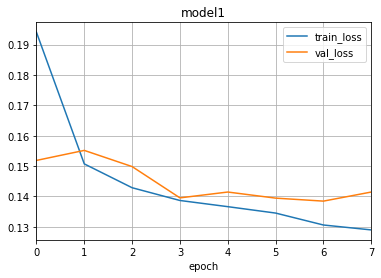

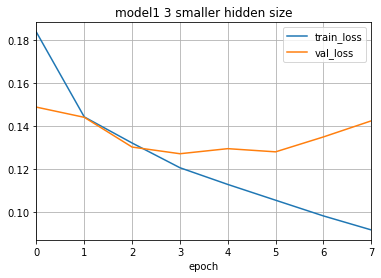

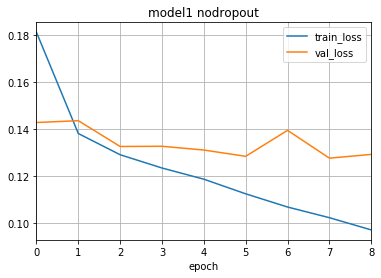

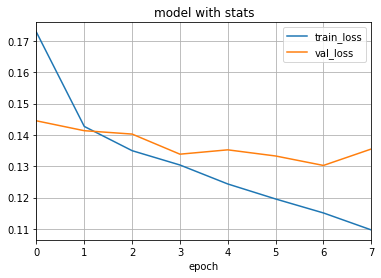

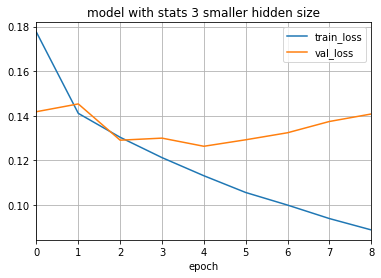

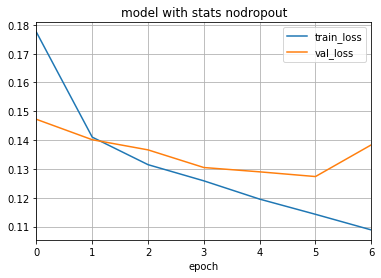

In [9]:
traj_dict = {}
for subdir in subdirs:
    model_name, traj_df = plot_trajectories(subdir)
    traj_dict[model_name] = traj_df

### Loss comparison across models

In [17]:
def plot_loss_comparison(loss_df, title):
    figure, ax = plt.subplots()
    
    loss_df.plot(ax=ax, 
                 title=title, 
                 legend=True, 
                 grid=True)
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [20]:
val_loss_dict = {}
train_loss_dict = {}
for model_name, traj_df in traj_dict.items():
    val_loss_dict[model_name] = list(traj_df['val_loss'].values)
    train_loss_dict[model_name] = list(traj_df['train_loss'].values)

### - Validation Loss

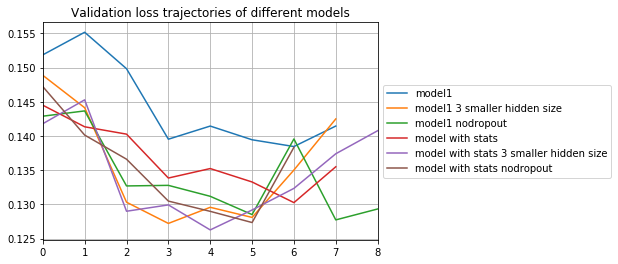

In [23]:
val_loss_df = pd.DataFrame.from_dict(val_loss_dict, orient='index')
val_loss_df = val_loss_df.transpose()

plot_loss_comparison(val_loss_df, 'Validation loss trajectories of different models')

### - Training Loss 
(Not much information but for the sake of completeness)

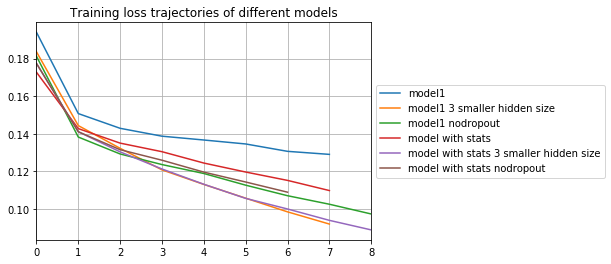

In [21]:
train_loss_df = pd.DataFrame.from_dict(train_loss_dict, orient='index')
train_loss_df = train_loss_df.transpose()

plot_loss_comparison(train_loss_df, 'Training loss trajectories of different models')

### Validation Loss Comparison Within Each Experiment

In [25]:
def plot_experiment_val_loss(val_loss_df, title, columns):
    """ Title contains information about the purpose of this experiment.
    Columns contain the model names that are relevant to this experiment. 
    """
    plot_df = val_loss_df[columns]
    
    title = 'Validation loss comparison: ' + title
    
    figure, ax = plt.subplots()
    
    plot_df.plot(ax=ax, 
                 title=title, 
                 legend=True, 
                 grid=True)
    

#### Experiments

In [35]:
experiments = {
    'effect of stats feature':
    ['model1', 'model with stats', 'model1 nodropout', 'model with stats nodropout'],
    'effect of dropout':
    ['model1', 'model1 nodropout', 'model with stats', 'model with stats nodropout'],
    'effect of a smaller LSTM hidden size': 
    ['model1', 'model1 3 smaller hidden size', 'model with stats', 'model with stats 3 smaller hidden size']
}


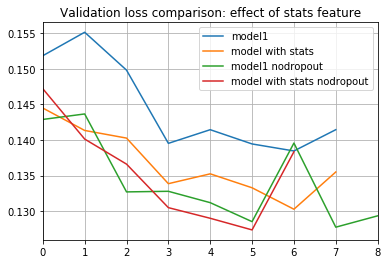

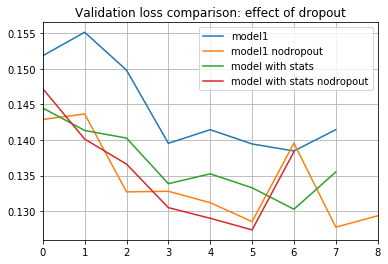

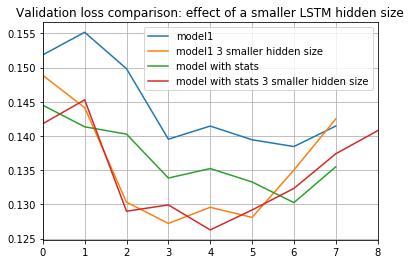

In [36]:
for title, columns in experiments.items():
    plot_experiment_val_loss(val_loss_df, title, columns)

In [37]:
experiments = {
    'effect of stats features with dropout': 
    ['model1', 'model with stats'],
    'effect of stats features without dropout': 
    ['model1 nodropout', 'model with stats nodropout'],
    'effect of dropout without stats features': 
    ['model1', 'model1 nodropout'],
    'effect of dropout with stats features': 
    ['model with stats', 'model with stats nodropout'],
    'effect of LSTM hidden size with stats features':
    ['model with stats', 'model with stats 3 smaller hidden size'],
    'effect of LSTM hidden size without stats features':
    ['model1', 'model1 3 smaller hidden size']
}

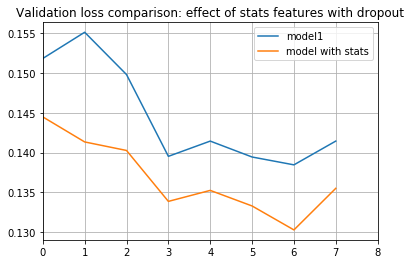

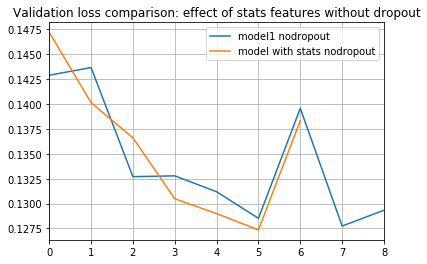

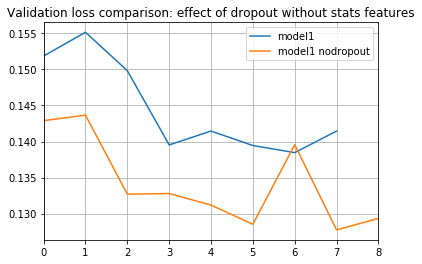

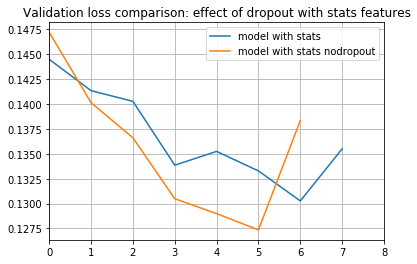

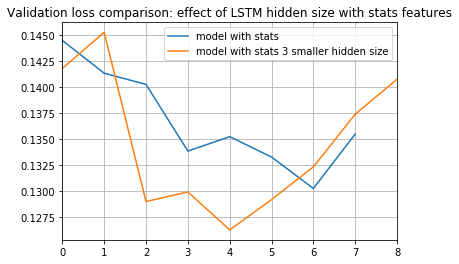

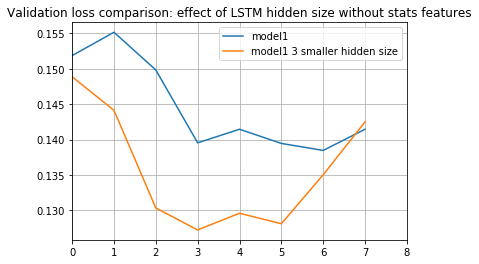

In [38]:
for title, columns in experiments.items():
    plot_experiment_val_loss(val_loss_df, title, columns)

### Observations
- **statistical features** improved model performance
- **dropout** layer seemed to decrease val loss
- **smaller hidden sizes** resulted in lower best val loss and earlier stopping